# Project data science salary 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [58]:
data = pd.read_csv('ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [59]:
data.shape

(3755, 11)

# prepare 

In [61]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [60]:
data.isna().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [62]:
data['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [63]:
data['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [64]:
data['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

# Analyze

In [65]:
data.groupby('experience_level')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,320.0,78546.284375,52225.424309,5409.0,40000.0,70000.0,110009.25,300000.0
EX,114.0,194930.929825,70661.929661,15000.0,145000.0,196000.0,239000.00,416000.0
MI,805.0,104525.939130,54387.685128,5132.0,66837.0,100000.0,135000.00,450000.0
SE,2516.0,153051.071542,56896.263954,8000.0,115000.0,146000.0,185900.00,423834.0


In [66]:
data.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,454.0,118300.982379,75832.391505,5409.0,60830.75,108500.0,159175.00,423834.0
M,3153.0,143130.548367,58992.813382,5132.0,102100.00,140000.0,180000.00,450000.0
S,148.0,78226.682432,61955.141792,5679.0,35668.00,62146.0,107481.75,416000.0


In [67]:
data.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean()

experience_level  company_size
EN                L                72896.810000
                  M                87416.456140
                  S                59120.734694
EX                L               165363.153846
                  M               198857.284211
                  S               196827.166667
MI                L                89135.731343
                  M               111586.421900
                  S                58080.500000
SE                L               156159.690821
                  M               153643.334069
                  S               106875.465116
Name: salary_in_usd, dtype: float64

In [68]:
data.groupby(['experience_level', 'company_size'])['salary_in_usd'].describe()

count           mean            std      min  \
experience_level company_size                                                  
EN               L              100.0   72896.810000   61675.338071   5409.0   
                 M              171.0   87416.456140   47181.318309   5707.0   
                 S               49.0   59120.734694   40804.608680   6072.0   
EX               L               13.0  165363.153846   76509.601946  76309.0   
                 M               95.0  198857.284211   66041.160611  15000.0   
                 S                6.0  196827.166667  119289.827845  69741.0   
MI               L              134.0   89135.731343   58250.540795   6072.0   
                 M              621.0  111586.421900   52253.408927   5132.0   
                 S               50.0   58080.500000   36012.445233   5679.0   
SE               L              207.0  156159.690821   71776.028169   8000.0   
                 M             2266.0  153643.334069   54768.256294  18907.0   
                 S               43.0  106875.465116   67570.517515  10000.0   

                                     25%       50%       75%       max  
experience_level company_size                                           
EN               L              29142.50   58551.0  100000.0  300000.0  
                 M              51000.00   80000.0  125000.0  220000.0  
                 S              21669.00   52008.0   90000.0  150000.0  
EX               L             106000.00  150000.0  230000.0  325000.0  
                 M             147500.00  200000.0  239000.0  353200.0  
                 S             131416.50  190000.0  200000.0  416000.0  
MI               L              46637.50   82849.5  114500.0  423000.0  
                 M              75000.00  102200.0  145000.0  450000.0  
                 S              30772.25   58000.0   74750.0  200000.0  
SE               L             105700.00  150000.0  196920.0  423834.0  
                 M             116250.00  147100.0  185900.0  385000.0  
                 S              54327.00   91237.0  142500.0  275000.0

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='company_size'>

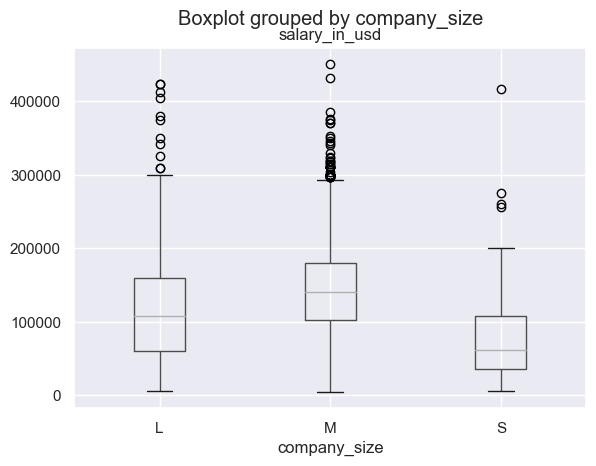

In [69]:
data.boxplot(column='salary_in_usd', by='company_size')

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='experience_level'>

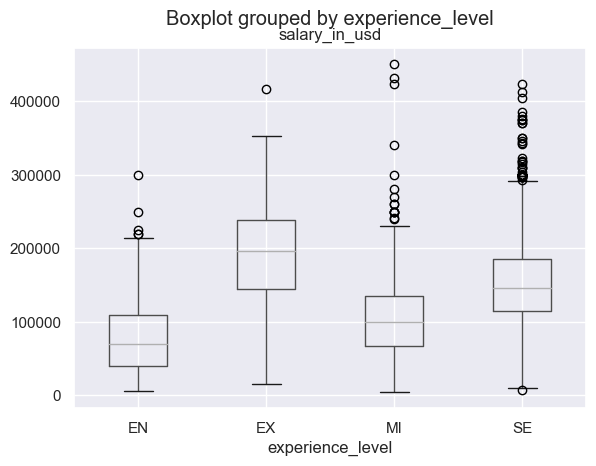

In [70]:
data.boxplot(column='salary_in_usd', by='experience_level')

# Report

In [71]:
plot_salary = data.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().unstack()

In [72]:
plot_salary

experience_level,EN,EX,MI,SE
company_size,,,,
L,72896.810000,165363.153846,89135.731343,156159.690821
M,87416.456140,198857.284211,111586.421900,153643.334069
S,59120.734694,196827.166667,58080.500000,106875.465116


# Re-order index and columns

In [73]:
plot_salary = plot_salary.reindex(index=['S', 'M', 'L'])
plot_salary = plot_salary[['EN', 'MI', 'SE', 'EX']]
plot_salary

experience_level,EN,MI,SE,EX
company_size,,,,
S,59120.734694,58080.500000,106875.465116,196827.166667
M,87416.456140,111586.421900,153643.334069,198857.284211
L,72896.810000,89135.731343,156159.690821,165363.153846


# Visualize results

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

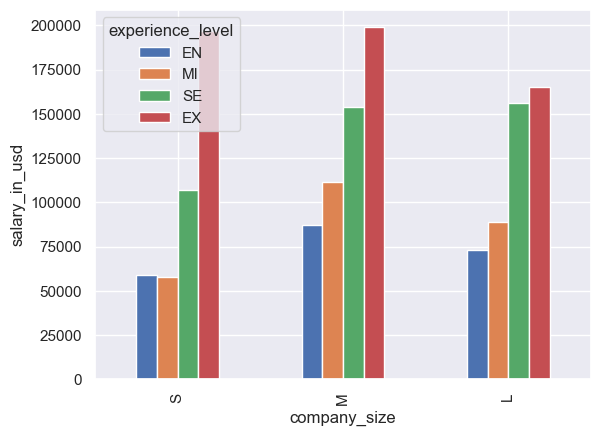

In [74]:
plot_salary.plot.bar(ylabel='salary_in_usd')

# Report

**present finding**

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

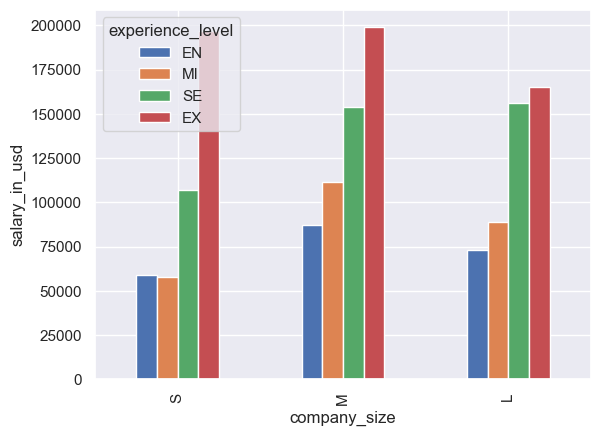

In [86]:
plot_salary.plot.bar(ylabel='salary_in_usd')

**credibility count**